In [11]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from numpy import linalg as LA
import math

Question 2.1

In [12]:
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test - test set, a 2D numpy array of size (num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    std_train= np.std(train,axis=0)
    remove_feature=[]  
    for i in range(0,train.shape[1]):
        if (std_train[i]==0):
            remove_feature.append(i)
    train=np.delete(train,remove_feature,1)
    train=(train - train.min(axis=0))/(train.max(axis=0)- train.min(axis=0))
    test=(test - train.min(axis=0))/(train.max(axis=0)- train.min(axis=0))
    return train,test


In [13]:
    df = pd.read_csv('data-Copy1.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term

Split into Train and Test
Scaling all to [0, 1]


Question 2.2

Question 2.2.5)

In [14]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the average square loss, scalar
    """
    loss = 0 #Initialize the average square loss
    #TODO
    num_instances,number_features = X.shape[0],X.shape[1]
    product = np.dot(X,theta)
    loss = product - y
    squared_loss = np.square(loss)/(num_instances)
    loss=np.sum(squared_loss,axis=0)
    return loss


Question 2.2.6

In [15]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    product = np.dot(X,theta)
    diff = product - y
    gradient = 2*np.dot(X.T,diff)/diff.shape[0]
    return gradient


Question 2.3

In [16]:
def batch_grad_descent(X, y, alpha=0.001, num_step=2000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
  #TODO
    for i in range(0,num_step+1):
        theta = theta - alpha*((compute_square_loss_gradient(X,y,theta)))
        theta_hist[i,:] = theta.T
        loss_hist[i] = compute_square_loss(X,y,theta)
    return loss_hist,theta_hist


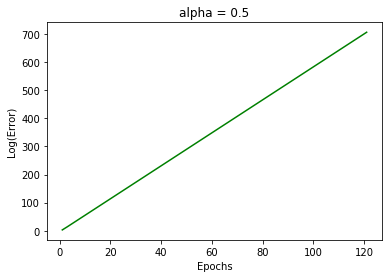

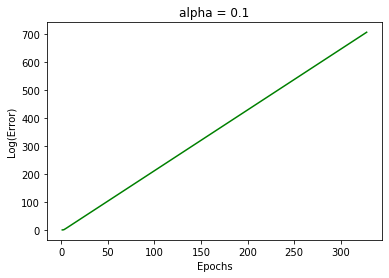

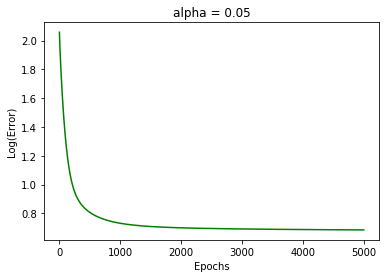

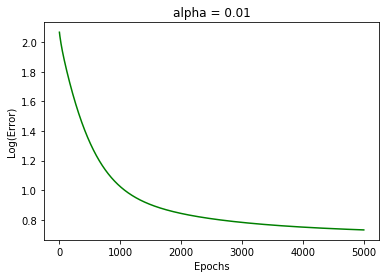

In [17]:
np.seterr(all='ignore')
alphas = np.array([0.5, 0.1, 0.05, 0.01])
for alpha in alphas:
    steps = 5000
    steps2 = np.arange(1,steps+2)
    loss,theta = batch_grad_descent(X_train,y_train,alpha,steps)
    plt.plot(steps2, np.log(loss), color='g')
    plt.ylabel('Log(Error)')
    plt.xlabel('Epochs')
    plt.title('alpha = ' + str(alpha))
    plt.show()



It is observed that when the step size is large , the gradient descent diverges, however on reducing the step range the performance improves and gradient descent converges, however on reducing the step size too low, the convergence does not improve as we are taking really small steps at one time

Question 2.3.3

In [18]:
def backtrack_line_search(X,y,theta,beta,alpha):
    t=1
    gradient = compute_square_loss_gradient(X,y,theta)
    norm = LA.norm(gradient,2)
    steps=0
    while(compute_square_loss(X,y,theta) - compute_square_loss(X,y,theta - t*gradient) + alpha*(t)*(np.dot(gradient,gradient)))<0:
        t = beta*t
        steps=steps+1
    return t,steps
stp,steps=backtrack_line_search(X_train,y_train,np.zeros(X_train.shape[1]),0.8,0.3)
print("t =" + str(stp))
print("Iterations = "+ str(steps))

t =0.10737418240000006
Iterations = 10


The backtrack line search algorithm took 10 steps to find the best step size,
through gradient descent, we had to find the guess the step size. Even the step size we
guess will be an approximation and not an exact value
Gradient descent will take more time since the algorithm goes through the entire data set to 
take one step and the total number of steps are large. After that we estimate alpha based on our findings
In Backtrack line search, we go through the entire data set for a fewer number of steps
and when the inequality holds true, we terminate the algorithm. We do not wait for convergence
Hence the Backtrack line search takes less time to find the optimal step size

Number of operation counts
Gradient descent - For every epoch we calculate the partial derivative of the entire data set once.
Therefore total number of partial derivate operations = Number of Epochs

Backtrack line search - For every step, we will calculate the average loss function atleast 2 times over the entire data set.
Total number of average sqaure loss operations $\geq$ steps*2

Operation count of Backtrack line search will be less if steps $<$ Epochs/2


Question 2.4

In [19]:
def stochastic_grad_descent(X, y, alpha=0.01, num_epoch=1000):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    theta = theta[:,None]
    t=1
    
    alpha2 = alpha
    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    for j in range(0,num_epoch):
        if(isinstance(alpha2,str)):
            if alpha2[alpha2.find('/')+1:] == "sqrt(t)":
                alpha = float(alpha2[0:alpha2.find('/')])/math.sqrt(t)
            if alpha2[alpha2.find('/')+1:] == "t":
                alpha = float(alpha2[0:alpha2.find('/')])/t
        for i in range(0,num_instances):
            index = np.random.randint(num_instances)
            x = X[index:index+1,:]
            yn=y[index]
            theta = theta - (alpha*(np.dot(x,theta) - yn)*x).T
            theta_hist[j:j+1,i:i+1] = theta.T
            loss_hist[j,i] = compute_square_loss(x,yn,theta)
        t=t+1
    return theta_hist,loss_hist
    #TODO


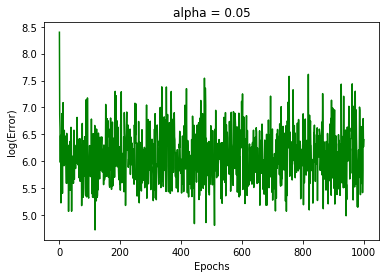

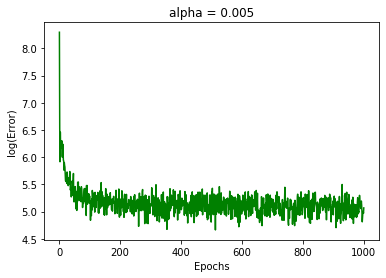

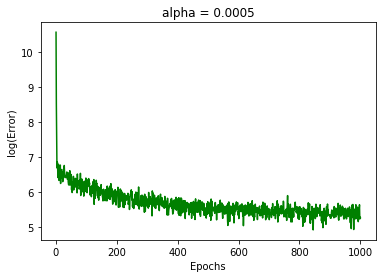

[-1.45321515e+00  6.31868714e-01  1.64360647e+00  2.95780432e+00
 -2.36465282e+00 -9.18203715e-01 -9.98956311e-01 -9.98956311e-01
  9.69033931e-01  1.58302456e+00  3.05477036e+00 -7.18122258e-01
 -1.40636909e+00 -4.82706889e+00  1.76255359e+00  2.85846224e+00
  1.35830397e+00  7.40470721e-01 -9.10713468e-04 -9.10713468e-04
 -9.10713468e-04 -4.34040108e-02 -4.34040108e-02 -4.34040108e-02
 -5.72181094e-03 -5.72181094e-03 -5.72181094e-03  1.28766445e-02
  1.28766445e-02  1.28766445e-02  2.35571144e-02  2.35571144e-02
  2.35571144e-02 -5.82482140e-02 -5.82482140e-02 -5.82482140e-02
  8.59115275e-02  8.59115275e-02  8.59115275e-02  7.05786328e-02
  7.05786328e-02  7.05786328e-02  6.37965384e-02  6.37965384e-02
  6.37965384e-02  6.01279337e-02  6.01279337e-02  6.01279337e-02
 -1.32278960e+00]


In [20]:
alpha=0.05
while alpha>=0.0005:
    steps2 = np.arange(1,1001)
    theta,loss = stochastic_grad_descent(X_train,y_train,alpha)
    plt.plot(steps2, np.log(np.sum(loss,axis=1)), color='g')
    plt.ylabel('log(Error)')
    plt.xlabel('Epochs')
    plt.title('alpha = ' + str(alpha))
    plt.show()
    alpha=alpha/10
print(theta[999,99])

Optimal step size is approximately 0.005

Alpha = 1/t

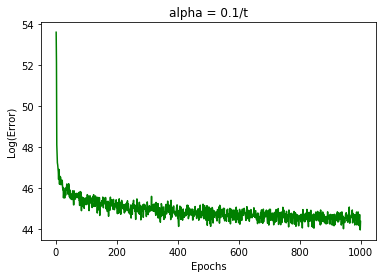

In [21]:
alpha="0.1/t"
steps2 = np.arange(1,1001)
theta,loss = stochastic_grad_descent(X_train,y_train,alpha)
plt.plot(steps2,np.log(np.sum(loss,axis=1)), color='g')
plt.ylabel('Log(Error)')
plt.xlabel('Epochs')
plt.title('alpha = ' + str(alpha))
plt.show()


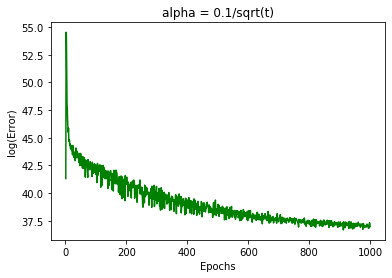

In [31]:
alpha="0.1/sqrt(t)"
steps2 = np.arange(1,1001)
theta,loss = stochastic_grad_descent(X_train,y_train,alpha)
plt.plot(steps2, np.log(np.sum(loss,axis=1)), color='g')
plt.ylabel('log(Error)')
plt.xlabel('Epochs')
plt.title('alpha = ' + str(alpha))
plt.show()

Result of the second rule is better

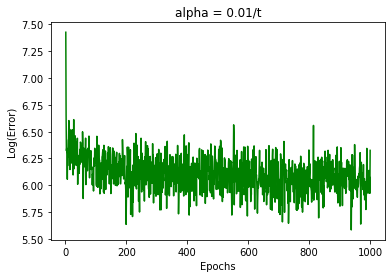

In [23]:
    C = 0.01
    alpha=str(C) + "/t"
    steps2 = np.arange(1,1001)
    theta,loss = stochastic_grad_descent(X_train,y_train,alpha)
    plt.plot(steps2, np.log(np.sum(loss,axis=1)), color='g')
    plt.ylabel('Log(Error)')
    plt.xlabel('Epochs')
    plt.title('alpha = ' + str(alpha))
    plt.show()

Optimal Parameter for which C/t shows least error is 0.01. and theta is 

In [24]:
theta[999,99]

array([-0.7290124 ,  0.18952856,  0.76477542,  0.94011786, -0.67351106,
       -0.37035886, -0.36711893, -0.36711893,  0.2433665 ,  0.67676655,
        0.92882201, -0.2148593 , -1.13361523, -1.71132009,  0.81816869,
        1.14318257,  0.97273235,  0.88906113, -0.01703863, -0.01703863,
       -0.01703863, -0.03361731, -0.03361731, -0.03361731,  0.01056039,
        0.01056039,  0.01056039,  0.03161815,  0.03161815,  0.03161815,
        0.04348867,  0.04348867,  0.04348867,  0.09275322,  0.09275322,
        0.09275322,  0.14869144,  0.14869144,  0.14869144,  0.11633163,
        0.11633163,  0.11633163,  0.10159195,  0.10159195,  0.10159195,
        0.09348684,  0.09348684,  0.09348684, -0.94985086])

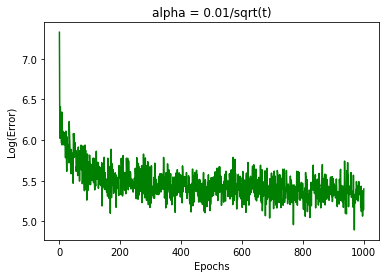

In [25]:
    C = 0.01

    alpha=str(C) + "/sqrt(t)"
    steps2 = np.arange(1,1001)
    theta,loss = stochastic_grad_descent(X_train,y_train,alpha)
    plt.plot(steps2, np.log(np.sum(loss,axis=1)), color='g')
    plt.ylabel('Log(Error)')
    plt.xlabel('Epochs')
    plt.title('alpha = ' + str(alpha))
    plt.show()

Optimal Parameter for which C/t shows least error is 0.01. and theta is 

In [26]:
theta[999,99]

array([-1.49646036e+00,  6.17722135e-01,  1.62665646e+00,  3.26839426e+00,
       -2.60742746e+00, -8.36722283e-01, -1.01443780e+00, -1.01443780e+00,
        1.06538052e+00,  1.55051200e+00,  3.28296566e+00, -8.68121659e-01,
       -1.18112905e+00, -5.08603289e+00,  1.76311634e+00,  3.00710597e+00,
        1.36794226e+00,  7.16822239e-01, -1.22999992e-02, -1.22999992e-02,
       -1.22999992e-02, -5.58260549e-02, -5.58260549e-02, -5.58260549e-02,
       -1.73845038e-02, -1.73845038e-02, -1.73845038e-02,  1.69479527e-03,
        1.69479527e-03,  1.69479527e-03,  1.26828625e-02,  1.26828625e-02,
        1.26828625e-02, -7.44974701e-02, -7.44974701e-02, -7.44974701e-02,
        7.16871942e-02,  7.16871942e-02,  7.16871942e-02,  5.81047334e-02,
        5.81047334e-02,  5.81047334e-02,  5.21589999e-02,  5.21589999e-02,
        5.21589999e-02,  4.89622026e-02,  4.89622026e-02,  4.89622026e-02,
       -1.31867711e+00])

In [27]:
def average_stochastic_grad_descent(X, y, alpha=0.01, num_epoch=1000):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    theta = theta[:,None]
    t=1
    alpha2 = alpha
    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    for j in range(0,num_epoch):
        if alpha2 == "0.1/sqrt(t)":
            alpha = 0.1/math.sqrt(t)
        if alpha2 == "0.1/t":
            alpha = 0.1/t
        for i in range(0,num_instances):
            index = np.random.randint(num_instances)
            x = X[index:index+1,:]
            yn=y[index]
            theta = theta - (alpha*(np.dot(x,theta) - yn)*x).T
            theta_hist[j:j+1,i:i+1] = theta.T
            loss_hist[j,index] = compute_square_loss(x,yn,theta)
        temp = theta_hist[j]
        theta = np.sum(temp,axis=0)/temp.shape[0]
        theta=theta[:,None]
        t=t+1
    return theta_hist,loss_hist
    #TODO


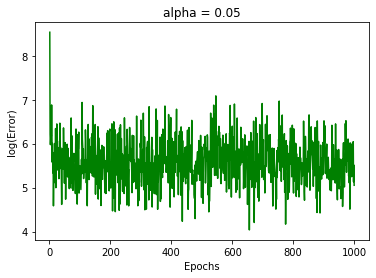

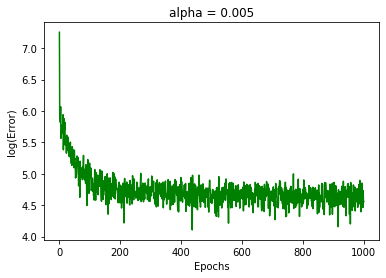

In [28]:
alpha=0.05
while alpha>=0.005:
    steps2 = np.arange(1,1001)
    theta,loss = average_stochastic_grad_descent(X_train,y_train,alpha)
    plt.plot(steps2, np.log(np.sum(loss,axis=1)), color='g')
    plt.ylabel('log(Error)')
    plt.xlabel('Epochs')
    plt.title('alpha = ' + str(alpha))
    plt.show()
    alpha=alpha/10

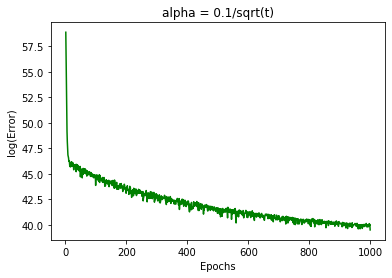

In [29]:
alpha="0.1/sqrt(t)"
steps2 = np.arange(1,1001)
theta,loss = average_stochastic_grad_descent(X_train,y_train,alpha)
plt.plot(steps2, np.log(np.sum(loss,axis=1)), color='g')
plt.ylabel('log(Error)')
plt.xlabel('Epochs')
plt.title('alpha = ' + str(alpha))
plt.show()

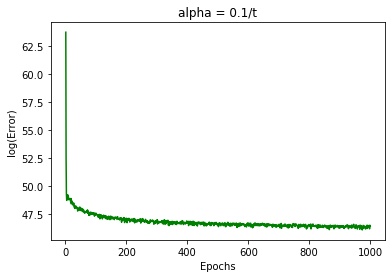

In [30]:
alpha="0.1/t"
steps2 = np.arange(1,1001)
theta,loss = average_stochastic_grad_descent(X_train,y_train,alpha)
plt.plot(steps2, np.log(np.sum(loss,axis=1)), color='g')
plt.ylabel('log(Error)')
plt.xlabel('Epochs')
plt.title('alpha = ' + str(alpha))
plt.show()